In [10]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import Xception
from tensorflow.keras.optimizers import Adam


In [11]:
# Data directories
data_dir_train = pathlib.Path("C:/Major Project 2023 7th sem/DATA SET/Train")
data_dir_test = pathlib.Path("C:/Major Project 2023 7th sem/DATA SET/Test")

In [12]:
# Parameters
batch_size = 32
img_height = 180
img_width = 180
num_classes = 9  # Update this with the number of classes in your dataset

In [13]:
# Data preprocessing and augmentation
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset="training",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2322 files belonging to 9 classes.
Using 1858 files for training.


In [14]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset="validation",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2322 files belonging to 9 classes.
Using 464 files for validation.


In [15]:
# Model
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(img_height, img_width, 3)
)
base_model.trainable = False

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [16]:
model = Sequential([
    layers.Rescaling(1./255),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes)
])


In [17]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
# Train the model
epochs = 15
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)


Epoch 1/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.2849 - loss: 2.0065 - val_accuracy: 0.4095 - val_loss: 1.6560
Epoch 2/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.4278 - loss: 1.6085 - val_accuracy: 0.4332 - val_loss: 1.5667
Epoch 3/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.4983 - loss: 1.4419 - val_accuracy: 0.4634 - val_loss: 1.4669
Epoch 4/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.5014 - loss: 1.3683 - val_accuracy: 0.4849 - val_loss: 1.4180
Epoch 5/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - accuracy: 0.5586 - loss: 1.2554 - val_accuracy: 0.4978 - val_loss: 1.3632
Epoch 6/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.5545 - loss: 1.2138 - val_accuracy: 0.4914 - val_loss: 1.3748
Epoch 7/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.6083 - loss: 1.1442 - val_accuracy: 0.5237 - val_loss: 1.3135
Epoch 8/15
59/59 ━━━━━━━━━━━━━━━━━━━━ 99s 2s/step - accuracy: 0.6034 - loss: 1.0907 - val_accuracy: 0.5216 - val_

In [19]:
# Plotting training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)


Text(0, 0.5, 'Accuracy')

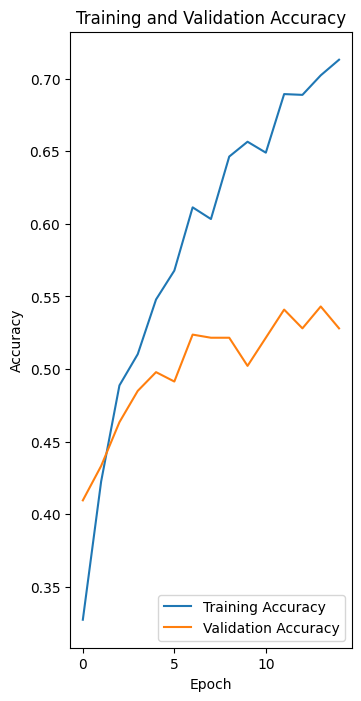

In [20]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

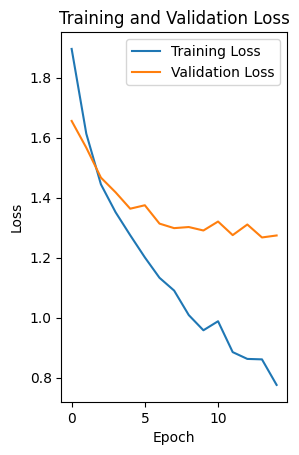

In [21]:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()